In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [17]:
# Normalize the pixel values to the range [0, 1]
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255


In [18]:
# Flatten the images to 1D arrays
X_train_flat = X_train.reshape((-1, 28*28))
X_test_flat = X_test.reshape((-1, 28*28))

In [19]:
# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(28*28,)),
    keras.layers.Dense(10, activation="softmax")
])


In [20]:
# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


In [21]:
# Train the model
model.fit(X_train_flat, y_train, epochs=10, batch_size=32)


Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2537 - accuracy: 0.9284
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1117 - accuracy: 0.9670
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0772 - accuracy: 0.9759
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0571 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0454 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0348 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0284 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0224 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0191 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.015

In [22]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_flat, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


313/313 - 1s - loss: 0.0835 - accuracy: 0.9789 - 708ms/epoch - 2ms/step
Test accuracy: 0.9789


In [23]:
# Make predictions on the test set
y_pred = np.argmax(model.predict(X_test_flat), axis=-1)


313/313 [==============================] - 1s 1ms/step


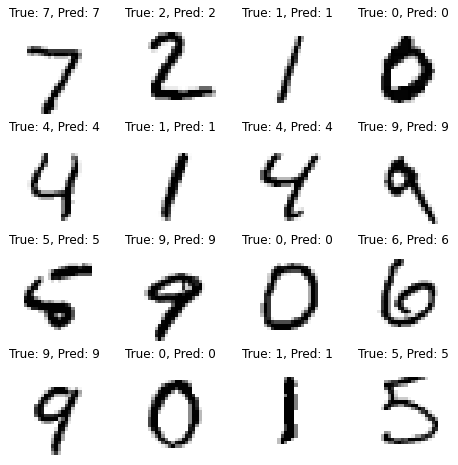

In [24]:
# Plot some example predictions
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i], cmap="binary")
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis("off")
plt.show()
